# Machine Learning Regression Task

This notebook focuses on reconstructing the latitude of the data.

First the data from the preprocessing is loaded.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt
import os

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

folder = 'processed/'
if not os.path.exists(folder[:-1]):
    os.makedirs(folder[:-1])


#load dataframe
df = pd.read_csv(folder + 'df.csv', delimiter = ',')
#shuffle the dataframe
df = df.sample(frac=1).reset_index(drop=True)
df = df.drop(['Unnamed: 0'], axis =1)

#reduce the dataframe size to 100000
df=df[:100000]
df

,s1_latitude,s1_longitude,s1_height,s1_arrival,s1_amplitude,s2_latitude,s2_longitude,s2_height,s2_arrival,s2_amplitude,s3_latitude,s3_longitude,s3_height,s3_arrival,s3_amplitude,timeAtServer,latitude,longitude,baroAltitude,geoAltitude
0,51.872524,-0.506857,181.261017,9.230699e+11,0.180672,52.780922,-1.204590,42.761841,9.230702e+11,0.260331,51.245861,-0.768550,89.977486,9.230699e+11,0.155172,922.102,51.548690,0.556183,9144.00,9448.80
1,50.937081,7.353797,262.311051,3.578505e+12,0.331933,49.287572,7.603982,410.652000,3.578505e+12,0.270833,49.471601,7.696532,273.985000,3.578505e+12,0.187500,3577.536,49.897807,6.189608,10210.80,10500.36
2,50.116819,8.358244,266.413934,3.179083e+12,0.365546,50.048584,8.487752,92.620644,3.179083e+12,0.293388,50.048573,8.487899,82.381000,3.179083e+12,0.489583,3178.091,50.381532,8.527321,7917.18,8046.72
3,47.347179,8.641771,658.186853,1.498329e+12,0.243697,49.529678,10.906069,321.081635,1.498329e+12,0.103306,48.365643,11.478421,497.984192,1.498329e+12,0.448276,1497.355,47.056778,9.545334,8839.20,9220.20
4,50.937081,7.353797,262.311051,1.410003e+12,0.222689,49.287572,7.603982,410.652000,1.410003e+12,0.093750,51.440416,6.751119,46.657000,1.410003e+12,0.322917,1409.046,50.583103,5.205812,9441.18,9700.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,47.347179,8.641771,658.186853,6.166560e+11,0.264706,48.891468,9.177591,302.881989,6.166555e+11,0.177686,48.365643,11.478421,497.984192,6.166559e+11,0.250000,615.675,49.161438,9.511766,4076.70,4213.86
99996,50.048584,8.487752,92.620644,2.301260e+12,0.134454,50.048573,8.487899,82.381000,2.301260e+12,0.302083,47.511948,10.280076,754.537476,2.301261e+12,0.172414,2300.273,50.096073,10.262418,11277.60,11460.48
99997,47.347179,8.641771,658.186853,2.567354e+12,0.285714,47.070521,7.620542,560.806758,2.567354e+12,0.095041,48.365643,11.478421,497.984192,2.567355e+12,0.137931,2566.376,48.157700,6.610748,10881.36,11269.98
99998,50.048584,8.487752,92.620644,2.403410e+12,0.176471,50.048573,8.487899,82.381000,2.403410e+12,0.260417,49.471601,7.696532,273.985000,2.403410e+12,0.635417,2402.421,49.153810,7.875029,11277.60,11574.78


# Train Test Split

Split the dataframe into training and testing dataset.
The latitude is reconstructed but the longitude and geometric altitude are not used for training.

In [2]:
#construct the Feautres X and the target y
X = df.drop(['latitude', 'longitude', 'geoAltitude'], axis =1)
y = df['latitude']
#split them into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True, random_state=0)
#save the y_test as the true values to be able to later compare this with the prediction
np.savetxt(folder + 'true.csv', y_test, delimiter=',')

Text(0, 0.5, 'latitude')

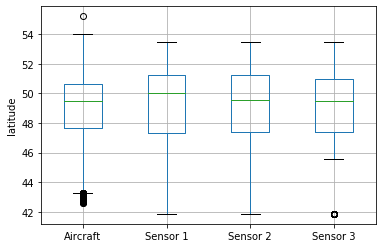

In [3]:
#visualisation of the training dataset
X_train_describe = X_train[['s1_latitude','s2_latitude','s3_latitude']]
X_train_describe.insert(0, 'latitude', y_train)
X_train_describe.columns = ['Aircraft', 'Sensor 1', 'Sensor 2', 'Sensor 3']
ax = X_train_describe.boxplot()
ax.set_ylabel('latitude')

Text(0, 0.5, 'latitude')

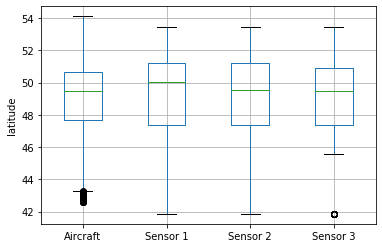

In [4]:
#visualisation of the testing dataset
X_test_describe = X_test[['s1_latitude','s2_latitude','s3_latitude']]
X_test_describe.insert(0, 'latitude', y_test)
X_test_describe.columns = ['Aircraft', 'Sensor 1', 'Sensor 2', 'Sensor 3']
ax = X_test_describe.boxplot()
ax.set_ylabel('latitude')

## Metrics
There are three metrics used to describe the accuracy of the models
* Mean Absolute Percentage Error (Mape), This metric is a linear depicition of the predicted towards the true latitude
* Root Mean Squared Error (RMSE) This metric scales accordingly with the deviation of the data.
* Mean Squared Error (MSE) Often used in this field of research. I use it to compare my model accuracy to others model accuracy.

In [5]:
#importing the metrics
from sklearn.metrics import mean_squared_error
#i needed to define my own mape error function
def mean_absolute_percentage_error(true, pred):
    M = 0
    #true = true.to_list()
    length = len(pred)
    for i in range(length):
        M += abs((true[i]-pred[i])/true[i])
    return 100*M/length
#a time array gets initiated, so the training time can be compared
t = [0]*4

## Models

There are two main models. For once the random forest (RF) and the support vector regressor (SVR).
There are 2 additional models for a comparision. A dummy model which calculates the mean of the latitude and a decision tree (DT). 

In [6]:
#dummy model of the mean
start = time.time()
y_pred = [df['latitude'].mean()]*y_test.count()
end = time.time()
t[0] = end-start
print('It took %s seconds for the training.'%(end - start))
np.savetxt(folder + 'mean.csv', y_pred, delimiter=',')

It took 0.0014834403991699219 seconds for the training.


In [7]:
#decision tree model
start = time.time()
regr = DecisionTreeRegressor()
regr = regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
np.savetxt(folder + 'decisiontree.csv', y_pred, delimiter=',')
end = time.time()
t[1] = end-start
print('It took %s seconds for the training.'%(end - start))

It took 0.9860496520996094 seconds for the training.


In [8]:
#random forest model
start = time.time()
regr = RandomForestRegressor(n_estimators = 500)
regr = make_pipeline(StandardScaler(), regr)
regr = regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
np.savetxt(folder + 'randomforest.csv', y_pred, delimiter=',')
end = time.time()
t[2] = end-start
print('It took %s seconds for the training.'%(end - start))

It took 272.88474225997925 seconds for the training.


In [9]:
#support vector regressor model
#this model requires the data to be normalized
#therefore there is a standardscaler pipeline applied to the data
start = time.time()
n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)
regr = SVR(kernel = 'rbf', C=5, gamma=0.05, epsilon=0.01, tol=5e-4, cache_size = 400)
regr = make_pipeline(StandardScaler(), regr)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
np.savetxt(folder + 'supportvector.csv', y_pred, delimiter=',')
end = time.time()
t[3] = end-start
print('It took %s seconds for the training.'%(end - start))

It took 734.1716539859772 seconds for the training.


## Results and visualization

Now the models have been trained and predicted the latitude. It is possible to compare those models with each other.
One other interesting result is the time, it had already been printed above.

In [10]:
#all methods used in this work
methods = ['mean.csv','decisiontree.csv', 'randomforest.csv', 'supportvector.csv']
#load the true latitude
y_true = np.loadtxt(folder + 'true.csv', delimiter = ',')

In [11]:
#creating an array of the errors

error = []
for i in methods:
    #creating a row to later append to the error array
    error_row = []
    #load the predicted latitude
    y_pred = np.loadtxt(folder + i, delimiter = ',')
    #MSE
    error_row.append(mean_squared_error(y_true, y_pred, squared=True))
    #RMSE
    error_row.append(mean_squared_error(y_true, y_pred, squared=False))
    #Mape
    error_row.append(mean_absolute_percentage_error(y_true, y_pred))
    #appending to the error array
    error.append(error_row)

#plotting the errors
df_error = pd.DataFrame(error,columns=['MSE','RMSE','MAPE'])
df_error['time [s]'] = t
df_error['methods'] = list(map(lambda i: i[:-4], methods)) 
df_error

,MSE,RMSE,MAPE,time [s],methods
0,3.619671,1.902543,3.273678,0.001483,mean
1,0.311571,0.558186,0.789860,0.986050,decisiontree
2,0.155215,0.393973,0.582066,272.884742,randomforest
3,0.205131,0.452914,0.694936,734.171654,supportvector


Text(0, 0.5, 'MAPE')

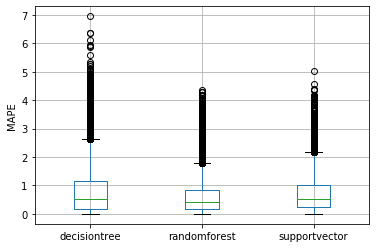

In [12]:
#plot the deviation of the MAPE as a box plot
mape = pd.DataFrame()
for name in methods[1:4]:
    y_pred = np.loadtxt(folder + name, delimiter = ',')
    col = []
    #the mape for a single datapoint
    for i in range(y_pred.shape[0]):
        col.append(abs((y_true[i]-y_pred[i])/y_true[i])*100)
    mape[name[:-4]] = col
ax = mape.boxplot()
ax.set_ylabel('MAPE')

Text(0.5, 0, 'true latitude')

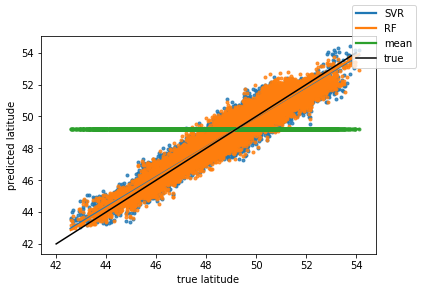

In [13]:
#plotting a comparision of the predicted points to the true points for the models in a single plot
compare = pd.DataFrame(y_test.to_list(),columns=['true'])
fig = plt.figure()
#restricting the plots, excluding the decision tree model
plotMethods = []
plotMethods.append(methods[3])
plotMethods.append(methods[2])
plotMethods.append(methods[0])

#iterating over the desired models to plot
for name in plotMethods:
    y_pred = np.loadtxt(folder + name, delimiter = ',')
    compare[name] = y_pred
    #regression plot
    sns.regplot([compare['true']], [compare[name]], marker = '.')
#adding the true plot
sns.lineplot([42,54],[42,54], color = 'black')
#adding labels in the legend
fig.legend(labels=['SVR','RF','mean','true'])
#adding the axis labels
plt.ylabel('predicted latitude')
plt.xlabel('true latitude')

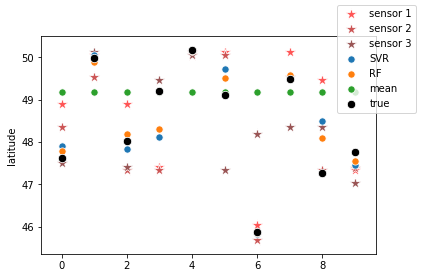

In [16]:
#plotting the predicted points of the models for the first couple of datapoints
#also plotting the localization of the sensors, to analyse a correlation of the prediction with 
#the sensors position

plot_points = 10 #amount of data points
s = 140 #size of marker
fig = plt.figure()
#scatter plot
sns.scatterplot(list(range(plot_points)),X_test[:plot_points]['s1_latitude'], color = '#ff5555', marker = '*', s =s)
sns.scatterplot(list(range(plot_points)),X_test[:plot_points]['s2_latitude'], color = '#cc5555', marker = '*', s =s)
sns.scatterplot(list(range(plot_points)),X_test[:plot_points]['s3_latitude'], color = '#995555', marker = '*', s =s)
for name in plotMethods:
    y_pred = np.loadtxt(folder + name, delimiter = ',')
    sns.scatterplot(list(range(plot_points)),y_pred[:plot_points],marker = '.', s=s*1.5 )
sns.scatterplot(list(range(plot_points)),y_test[:plot_points], marker = '.',s=s*2, color = 'black')
#setting the labels
fig.legend(labels=['sensor 1','sensor 2', 'sensor 3', 'SVR','RF','mean','true'])

## Discussion

The Random Forest and the SVR are better approximators for the latitude than the two comparision models. The Random Forest however is superior in this training procedure in terms of all accuracy metrics and the training time. The SVR would be very fast for a small dataset but doesn't scale very well with larger data sizes. The final pictures shows that the position reconstruction is not just an average of the sensor position but is capable to reconstruct the physical properties from the server, arrival time and the amplitude of the sensors and aircraft, as well as the position of the sensors.

However even if the MAPE is less then than 1%, this still correlates to a mistake of a couple of kilometers. For an exact position localization, a machine learning attempt might not be sufficient. However as a supplement for missing data or to track a spoofing attack, such a model can still be used.